<a href="https://colab.research.google.com/github/BNLCSISMR/Smoking-Obesity-Project/blob/main/XGBoost_SmokingTumorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install GEOparse



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 278 kB 5.1 MB/s 
  Created wheel for GEOparse: filename=GEOparse-2.0.3-py3-none-any.whl size=29065 sha256=fdbbf42ffe4b66d5ec4b0cadc8544141398f7f6d9c3fb132e74bcee0e039cbb7
  Stored in directory: /root/.cache/pip/wheels/4d/15/e8/fbf3b47444215d9728c20d7b35436b50086aa67c2ad6dcedad
Successfully built GEOparse


In [ ]:
import GEOparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline



gse = GEOparse.get_GEO(geo="GSE46699", destdir="./")


13-Oct-2022 08:49:27 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
13-Oct-2022 08:49:27 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46699/soft/GSE46699_family.soft.gz to ./GSE46699_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46699/soft/GSE46699_family.soft.gz to ./GSE46699_family.soft.gz
100%|██████████| 69.4M/69.4M [00:00<00:00, 107MB/s]
13-Oct-2022 08:49:28 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
13-Oct-2022 08:49:28 DEBUG downloader - Moving /tmp/tmpcllmc2fm to /content/GSE46699_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmpcllmc2fm to /content/GSE46699_family.soft.gz
13-Oct-2022 08:49:28 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46699/soft/GSE46699_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE466

In [ ]:
import pandas as pd
import torch


In [ ]:

print()
print("GSM example:")

for gsm_name, gsm in gse.gsms.items():
    print("Name: ", gsm_name)
    print("Metadata:",)
    for key, value in gsm.metadata.items():
        if(key == 'characteristics_ch1'):
         print(value[1])
         print(value[2])
         print(value[3])
    #print ("Table data:",)
    #print (gsm.table.head())
    

print()

#print("GPL example:")
#for gpl_name, gpl in gse.gpls.items():
 #   print("Name: ", gpl_name)
  #  print("Metadata:",)
   # for key, value in gpl.metadata.items():
    #    print(" - %s : %s" % (key, ", ".join(value)))
    #print("Table data:",)
    #print(gpl.table.head())
    #break


GSM example:
Name:  GSM1134764
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134765
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134766
Metadata:
tissue: normal
smoking: yes
obese: no
Name:  GSM1134767
Metadata:
tissue: tumor
smoking: yes
obese: no
Name:  GSM1134768
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134769
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134770
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134771
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134772
Metadata:
tissue: normal
smoking: yes
obese: no
Name:  GSM1134773
Metadata:
tissue: tumor
smoking: yes
obese: no
Name:  GSM1134774
Metadata:
tissue: normal
smoking: no
obese: no
Name:  GSM1134775
Metadata:
tissue: tumor
smoking: no
obese: no
Name:  GSM1134776
Metadata:
tissue: normal
smoking: yes
obese: no
Name:  GSM1134777
Metadata:
tissue: tumor
smoking: yes
obese: no
Name:  GSM1134778
Metadata:
tissue: normal
smoking: yes
obese: yes
Name:  GSM

Printing the name, head, and items

Create a merged table of the first gsm table we have. Print the head and test out accessing one column

In [ ]:
mergedTable = gsm.table
entry = mergedTable["VALUE"]

Iterate through all of the tables and add the values column to the end of the mergedTable

In [ ]:
for gsm_name, gsm in gse.gsms.items():
    entry = gsm.table["VALUE"]
    mergedTable.insert(1, gsm_name, value=entry, allow_duplicates=True)
    ##mergedTable = mergedTable.assign(gsm_name = entry)

    ##gsm.table = pd.merge(mergedTable, gsm.table, how = 'inner')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


Print mergedTable

drop the last column as it is a duplicate

In [ ]:
mergedTable = mergedTable.iloc[: , :-1]

Transpose the table to make ID_REF the index

In [ ]:
newMergeTable = mergedTable.transpose()

In [ ]:
newMergeTable = newMergeTable.rename(columns=newMergeTable.iloc[0])
newMergeTable = newMergeTable.iloc[1: , :]

In [ ]:
tissueList = []
tissue_label = []
smokingList = []
smoking_label = []
obesityList = []
obesity_label = []
for gsm_name, gsm in gse.gsms.items():
    for key, value in gsm.metadata.items():
        if(key == 'characteristics_ch1'):
         substringOne = 'tumor'
         substringTwo = 'yes'
         substringThree = 'yes'
         
         ##Appending all the values to tissue list if its a tumor or not (tumor = 1 normal = 0)
         if substringOne in value[1]:
           tissueList.append(1)
           tissue_label.append('tumor')
         else:
           tissueList.append(0)
           tissue_label.append('normal')
         
         ##Appending all teh values to the smoking list(smoker=1 non-smoker = 0)
         if substringTwo in value[2]:
           smokingList.append(1)
           smoking_label.append('yes')
         else:
           smokingList.append(0)
           smoking_label.append('no')

        ##Appending all teh values to the obesity list(obese = 1 not obese = 0)
         if substringThree in value[3]:
           obesityList.append(1)
           obesity_label.append('yes')
         else:
           obesityList.append(0)
           obesity_label.append('no')
  
print(tissueList)
print(tissue_label)

print(smokingList)
print(smoking_label)

print(obesityList)
print(obesity_label)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0]
['normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 'tumor', 'normal', 

Creating a labels dataframe

In [ ]:
#class_labels = pd.DataFrame()

#class_labels['Tissue'] = tissueList
#class_labels['Smoker'] = smokingList
#class_labels['Obesity'] = obesityList
print(newMergeTable)
#print(class_labels)
newMergeTable.shape

            1007_s_at   1053_at    117_at     121_at 1255_g_at   1294_at  \
GSM1304423  10.465147  5.131448  6.003662  11.353257  3.580513  7.227263   
GSM1304422   10.69537  6.117586  6.233694  11.162211  3.420228  7.583564   
GSM1304421   9.785637  4.844387  5.841087  11.198888  3.461025  7.071538   
GSM1304420  10.023791  6.786107  6.438581   9.745609  3.431811  7.204418   
GSM1134889    8.99498  5.530289  5.672777   9.624678  4.034493  6.979319   
...               ...       ...       ...        ...       ...       ...   
GSM1134768  10.106417  4.827499  5.668851  11.194256   3.47619  7.254072   
GSM1134767  10.735899  6.154403  6.539063  10.490871  3.499183  7.313254   
GSM1134766   9.919435  4.628159  5.636217  11.073223  3.479632  7.034347   
GSM1134765   9.812106  5.776783  6.422235  11.142645  3.524682  7.052937   
GSM1134764  10.654552  5.104113  5.372776  11.908765  3.500414  7.154525   

             1316_at   1320_at 1405_i_at   1431_at  ... AFFX-r2-Ec-bioD-3_at  \
GSM1304

(130, 54675)

Using tree based feature selection to get importance scores

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(newMergeTable, tissueList)
importances = clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
newMergeTableTwo = model.transform(newMergeTable)


importance_List = []




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


creating a list of all importance scores

In [ ]:
for i,v in enumerate(importances):
	importance_List.append(v)
print(importance_List)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011060438548000742, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005599707092244408, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005133064834557373, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004927742241175075, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005133064834557372, 0.0, 0.0, 0.0, 0.0, 0.0,

sorting all the scores descending

In [ ]:
sortedImportance_List = sorted(importance_List, reverse=True)
print(sortedImportance_List)

len(importance_List)


[0.003384365980817685, 0.002925244881927634, 0.0026369731771295384, 0.002611734932102579, 0.002511132397307975, 0.002425115539341518, 0.002419073463849583, 0.002300747235639101, 0.0022988025619604564, 0.0022374251224548986, 0.0022304897798398025, 0.0021998849290960163, 0.0021491554230544645, 0.002070336149938144, 0.002045656400689744, 0.0020331633311634293, 0.0020280843917761374, 0.002025577143058088, 0.0020147339245838395, 0.00201216141514649, 0.001991331586832344, 0.0019885046815611386, 0.00198033201250428, 0.0019801355541134904, 0.001977940982916107, 0.0019688970115409347, 0.001946920383309863, 0.001907312552363159, 0.0019044414458647644, 0.0018928787656577292, 0.0018698152377581321, 0.0018684355997788842, 0.0018504416692049954, 0.0018453260104661024, 0.0018275967103259208, 0.0018267671911218885, 0.0018025578401798152, 0.001799175666149116, 0.0017819067925677733, 0.0017724867724867714, 0.0017687248848515685, 0.001761741180717726, 0.001761677468203385, 0.0017361533172818807, 0.001724

54675

concrete example to help

Gets the index of the sorted features scores and adds them to list

In [ ]:
from sklearn.preprocessing import scale
from sklearn import decomposition
print("FEATURE IMPORTANCES", importance_List)
print("FEATURE IMPORTANCES(SORTED)", sortedImportance_List)
importance_indices = []

for i in sortedImportance_List:
  importance_indices.append(importance_List.index(i))

print("INDICES",importance_indices)

FEATURE IMPORTANCES [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011060438548000742, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005599707092244408, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005133064834557373, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004927742241175075, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005133064834557372, 0.0,

Check if the code worked

In [ ]:
print(importance_List[12704])

0.0


In [ ]:
x = []
for i in range(300):
  x.append(i)
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

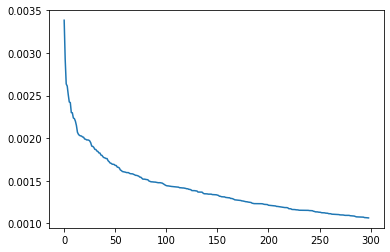

In [ ]:
plt.plot(x[0:299], sortedImportance_List[0:299])
plt.show()

Now time to create a new table of only the most important features

In [ ]:
finalMergeTable = pd.DataFrame()

#number of iterations based on how many features may be changed based on how many create a good PCA plot
for i in range (5):
  targetColumn = newMergeTable.iloc[:,importance_indices[i]]
  finalMergeTable.insert(len(finalMergeTable.columns), i, targetColumn)

print(finalMergeTable)


                   0         1         2         3         4
GSM1304423  9.420997  4.697013  4.163665  4.543641   3.23005
GSM1304422  7.882479  5.719906  5.397342  4.209435  3.406792
GSM1304421  9.262288  5.042922  3.855782  4.308148  3.298698
GSM1304420  8.498105  5.682843  3.514567  4.285673  3.329222
GSM1134889  7.655806  5.337687  4.057231  4.981605  3.441859
...              ...       ...       ...       ...       ...
GSM1134768  8.784843  4.981737  4.134929  4.865402  3.416042
GSM1134767   8.20578  5.529884   3.90554  4.325849  3.283722
GSM1134766  8.602714  4.951676  4.351082  4.626925  3.395723
GSM1134765  8.636406  6.786251  3.782476   4.29241  3.365199
GSM1134764  9.678947  5.084096  5.452298  4.182203  3.237271

[130 rows x 5 columns]


In [ ]:
pca = decomposition.PCA(n_components=4)
pca.fit(finalMergeTable)



PCA(n_components=4)

In [ ]:
scores = pca.transform(finalMergeTable)

In [ ]:
scores_df = pd.DataFrame(scores, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
scores_df

,PC1,PC2,PC3,PC4
0,-1.131319,0.176085,-0.167487,-0.113786
1,0.545896,0.650315,1.250218,-0.145183
2,-0.791072,-0.221142,-0.235400,-0.201519
3,0.207908,-0.523722,-0.311014,-0.074865
4,0.718981,0.569713,-0.273481,0.315006
...,...,...,...,...
125,-0.447820,0.354547,-0.220279,0.226603
126,0.353360,-0.094999,-0.086659,-0.139437
127,-0.312847,0.476812,-0.010617,-0.019711
128,0.514427,-1.174533,0.428226,0.415569


In [ ]:
for v in pca.explained_variance_ratio_:
    print('Explained variation per principal component: {}%'.format(round(v*100,2)))

Explained variation per principal component: 53.46%
Explained variation per principal component: 26.43%
Explained variation per principal component: 13.04%
Explained variation per principal component: 5.91%


In [ ]:
import plotly.express as px

In [ ]:
# Label to color dict (manual)
label_color_dict_tissue = {'tumor':'red','normal':'green'}
label_color_dict_obesity = {'yes': 'red', 'no': 'green'}
label_color_dict_smoker = {'yes': 'red', 'no': 'green'}

# Color vector creation
cvec_tissue = [label_color_dict_tissue[label] for label in tissue_label]
cvec_obesity = [label_color_dict_obesity[label] for label in obesity_label]
cvec_smoker = [label_color_dict_smoker[label] for label in smoking_label]

shape_tissue = []
for i in cvec_tissue:
  if(i=='green'):
    shape_tissue.append('normal')
  else:
    shape_tissue.append('tumor')

new_shape_tissue=pd.DataFrame()
new_shape_tissue['marker'] = shape_tissue

In [ ]:
print(cvec_tissue)
print(shape_tissue)
print(new_shape_tissue)

['green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'green', 'red', 'red', 'green', 'red', 'green', 'red', 'red', 'r

In [ ]:
#plt.figure(figsize=(8,8))
#for marker in shape_tissue:
#  plt.scatter(scores[:,0], scores[:,2],
#              c=cvec_tissue, edgecolor='', alpha=0.5, marker = marker)
#plt.xlabel('PC 1')
#plt.ylabel('PC 3')
#plt.show()

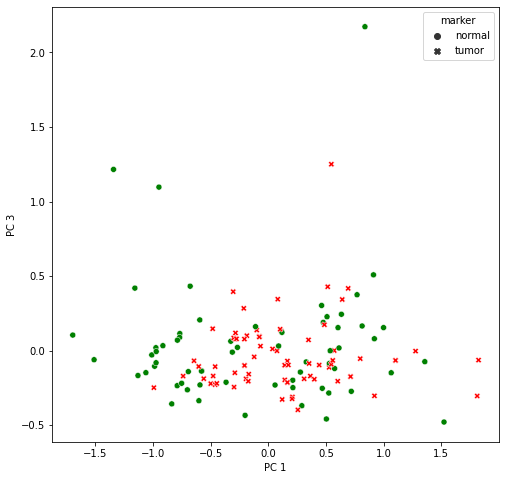

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,8))

sns.scatterplot(x=scores[:,0], y=scores[:,2], c=cvec_tissue, style=new_shape_tissue['marker'])
plt.xlabel('PC 1')
plt.ylabel('PC 3')
plt.show()

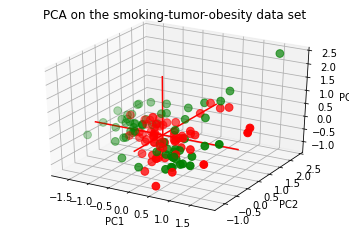

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scores[:,0], scores[:,1], scores[:,1], c=cvec_tissue, cmap="Set2_r", s=60)

xAxisLine = ((min(scores[:,0]), max(scores[:,0])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(scores[:,1]), max(scores[:,1])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(scores[:,2]), max(scores[:,2])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the smoking-tumor-obesity data set")
plt.show()

logsitic regression is sensitive to noise we chooose most important features so it can handle and make it more linearly separable

ensemble method (XGBoost):

https://www.nvidia.com/en-us/glossary/data-science/xgboost/
https://en.wikipedia.org/wiki/Gradient_boosting
multi perceptron data good at handling non-linear data but requires more training data

EXPLAIN EVERYTHING in simple but detailed way

Target Word Count: --> five pages (maybe even 10 pages)

SPLIT INTO TRAIN VALID AND TEST if test too small then use cross-validation https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

finalMergeTable['Smoker'] = smokingList
finalMergeTable['Obesity'] = obesityList

final_normalized = sc.fit_transform(finalMergeTable)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
finalMergeTable['Tissue'] = tissueList
finalMergeTable

,0,1,2,3,4,Smoker,Obesity,Tissue
GSM1304423,9.420997,4.697013,4.163665,4.543641,3.23005,0,0,0
GSM1304422,7.882479,5.719906,5.397342,4.209435,3.406792,0,0,1
GSM1304421,9.262288,5.042922,3.855782,4.308148,3.298698,1,0,0
GSM1304420,8.498105,5.682843,3.514567,4.285673,3.329222,1,0,1
GSM1134889,7.655806,5.337687,4.057231,4.981605,3.441859,0,0,0
...,...,...,...,...,...,...,...,...
GSM1134768,8.784843,4.981737,4.134929,4.865402,3.416042,0,0,1
GSM1134767,8.20578,5.529884,3.90554,4.325849,3.283722,0,0,1
GSM1134766,8.602714,4.951676,4.351082,4.626925,3.395723,0,0,0
GSM1134765,8.636406,6.786251,3.782476,4.29241,3.365199,0,0,1


In [ ]:
#trying to make the objects into floats
finalMergeTable.iloc[:, 0] = finalMergeTable.iloc[:, 0].astype(float, errors = 'raise')
finalMergeTable.iloc[:, 1] = finalMergeTable.iloc[:, 0].astype(float, errors = 'raise')
finalMergeTable.iloc[:, 2] = finalMergeTable.iloc[:, 0].astype(float, errors = 'raise')
finalMergeTable.iloc[:, 3] = finalMergeTable.iloc[:, 0].astype(float, errors = 'raise')
finalMergeTable.iloc[:, 4] = finalMergeTable.iloc[:, 0].astype(float, errors = 'raise')
finalMergeTable['Smoker'] = finalMergeTable['Smoker'].astype(float, errors = 'raise')
finalMergeTable['Obesity'] = finalMergeTable['Obesity'].astype(float, errors = 'raise')
finalMergeTable['Tissue'] = finalMergeTable['Tissue'].astype(float, errors = 'raise')

finalMergeTable.dtypes

0          float64
1          float64
2          float64
3          float64
4          float64
Smoker     float64
Obesity    float64
Tissue     float64
dtype: object

In [ ]:
finalMergeTable

,0,1,2,3,4,Smoker,Obesity,Tissue
GSM1304423,9.420997,9.420997,9.420997,9.420997,9.420997,0.0,0.0,0.0
GSM1304422,7.882479,7.882479,7.882479,7.882479,7.882479,0.0,0.0,1.0
GSM1304421,9.262288,9.262288,9.262288,9.262288,9.262288,1.0,0.0,0.0
GSM1304420,8.498105,8.498105,8.498105,8.498105,8.498105,1.0,0.0,1.0
GSM1134889,7.655806,7.655806,7.655806,7.655806,7.655806,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
GSM1134768,8.784843,8.784843,8.784843,8.784843,8.784843,0.0,0.0,1.0
GSM1134767,8.205780,8.205780,8.205780,8.205780,8.205780,0.0,0.0,1.0
GSM1134766,8.602714,8.602714,8.602714,8.602714,8.602714,0.0,0.0,0.0
GSM1134765,8.636406,8.636406,8.636406,8.636406,8.636406,0.0,0.0,1.0


In [ ]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

var_colums = [c for c in finalMergeTable.columns if c not in ['Tissue']]
X = finalMergeTable.loc[:, var_colums]
y = finalMergeTable.loc[:, 'Tissue']



X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [ ]:
X.dtypes

0          float64
1          float64
2          float64
3          float64
4          float64
Smoker     float64
Obesity    float64
dtype: object

In [ ]:
print(X)

                   0         1         2         3         4  Smoker  Obesity
GSM1304423  9.420997  9.420997  9.420997  9.420997  9.420997     0.0      0.0
GSM1304422  7.882479  7.882479  7.882479  7.882479  7.882479     0.0      0.0
GSM1304421  9.262288  9.262288  9.262288  9.262288  9.262288     1.0      0.0
GSM1304420  8.498105  8.498105  8.498105  8.498105  8.498105     1.0      0.0
GSM1134889  7.655806  7.655806  7.655806  7.655806  7.655806     0.0      0.0
...              ...       ...       ...       ...       ...     ...      ...
GSM1134768  8.784843  8.784843  8.784843  8.784843  8.784843     0.0      0.0
GSM1134767  8.205780  8.205780  8.205780  8.205780  8.205780     0.0      0.0
GSM1134766  8.602714  8.602714  8.602714  8.602714  8.602714     0.0      0.0
GSM1134765  8.636406  8.636406  8.636406  8.636406  8.636406     0.0      0.0
GSM1134764  9.678947  9.678947  9.678947  9.678947  9.678947     0.0      0.0

[130 rows x 7 columns]


In [ ]:
print(y)

GSM1304423    0.0
GSM1304422    1.0
GSM1304421    0.0
GSM1304420    1.0
GSM1134889    0.0
             ... 
GSM1134768    1.0
GSM1134767    1.0
GSM1134766    0.0
GSM1134765    1.0
GSM1134764    0.0
Name: Tissue, Length: 130, dtype: float64


Using kaggle and Git reference(other colab)
https://www.kaggle.com/code/prashant111/xgboost-k-fold-cv-feature-importance/notebook 

https://github.com/harsh1kumar/learning/blob/master/machine_learning/santander_trxn_prediction/07_trxn_pred_xgboost.ipynb 

In [ ]:
#model = XGBClassifier()
#model.fit(X_train, y_train)

model_xgboost = xgboost.XGBClassifier(learning_rate=0.1,
                                      max_depth=5,
                                     n_estimators=5000,
                                     subsample=0.5,
                                     colsample_bytree=0.5,
                                     eval_metric='auc',
                                     verbosity=1, 
                                      enable_categorical=True)

eval_set = [(X_valid, y_valid)]

model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.703125
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.69375
[2]	validation_0-auc:0.734375
[3]	validation_0-auc:0.771875
[4]	validation_0-auc:0.79375
[5]	validation_0-auc:0.80625
[6]	validation_0-auc:0.809375
[7]	validation_0-auc:0.821875
[8]	validation_0-auc:0.815625
[9]	validation_0-auc:0.815625
[10]	validation_0-auc:0.815625
[11]	validation_0-auc:0.815625
[12]	validation_0-auc:0.803125
[13]	validation_0-auc:0.803125
[14]	validation_0-auc:0.7875
[15]	validation_0-auc:0.7875
[16]	validation_0-auc:0.796875
[17]	validation_0-auc:0.746875
Stopping. Best iteration:
[7]	validation_0-auc:0.821875



XGBClassifier(colsample_bytree=0.5, enable_categorical=True, eval_metric='auc',
              max_depth=5, n_estimators=5000, subsample=0.5)

Evaluating Model Performance


In [ ]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.8328
AUC Valid: 0.8219


Hyperparamter Fine-Tuning

In [ ]:
learning_rate_list = [0.02, 0.05, 0.1]
max_depth_list = [2, 3, 5]
n_estimators_list = [1000, 2000, 3000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print(num_combinations)
params_dict

27


{'learning_rate': [0.02, 0.05, 0.1],
 'max_depth': [2, 3, 5],
 'n_estimators': [1000, 2000, 3000]}

In [ ]:
def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])

model_xgboost_hp = GridSearchCV(estimator=xgboost.XGBClassifier(subsample=0.5,
                                                                colsample_bytree=0.25,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=2,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=4)

model_xgboost_hp.fit(X, y)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.941, test=0.720) total time=   0.1s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=1000;, score=(train=0.920, test=0.685) total time=   0.1s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.969, test=0.721) total time=   0.2s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=2000;, score=(train=0.963, test=0.648) total time=   0.2s
[CV 1/2] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.974, test=0.714) total time=   0.3s
[CV 2/2] END learning_rate=0.02, max_depth=2, n_estimators=3000;, score=(train=0.976, test=0.619) total time=   0.3s
[CV 1/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.952, test=0.722) total time=   0.1s
[CV 2/2] END learning_rate=0.02, max_depth=3, n_estimators=1000;, score=(train=0.934, test=0.682) total time=   0.1s
[CV

GridSearchCV(cv=2,
             estimator=XGBClassifier(colsample_bytree=0.25, eval_metric='auc',
                                     subsample=0.5, use_label_encoder=False),
             param_grid={'learning_rate': [0.02, 0.05, 0.1],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [1000, 2000, 3000]},
             return_train_score=True,
             scoring=<function my_roc_auc_score at 0x7fa9702c3950>, verbose=4)

Let us look at the output of grid search step. We will retain only a few relevant columns and sort based on rank_test_score i.ee the performance on validation data

In [ ]:
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

,rank_test_score,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators
0,1,0.702590,0.930816,0.02,2,1000
3,2,0.701877,0.942663,0.02,3,1000
6,3,0.699978,0.943138,0.02,5,1000
1,4,0.684089,0.965879,0.02,2,2000
4,5,0.679581,0.970616,0.02,3,2000
7,6,0.679105,0.970616,0.02,5,2000
9,7,0.674134,0.973223,0.05,2,1000
12,8,0.667731,0.971328,0.05,3,1000
2,9,0.666779,0.975355,0.02,2,3000
15,10,0.665836,0.973224,0.05,5,1000


Let us try to find how does model perfomance vary with respect to number of trees and depth of tree

Text(0.5, 1.0, 'Performance wrt # of Trees and Depth')

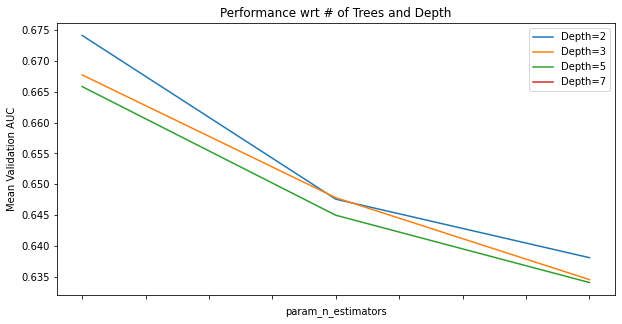

In [ ]:
# First sort by number of estimators as that would be x-axis
df_cv_results.sort_values(by='param_n_estimators', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_d2 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==2),:]
lr_d3 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==3),:]
lr_d5 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==5),:]
lr_d7 = df_cv_results.loc[(df_cv_results['param_learning_rate']==0.05) & (df_cv_results['param_max_depth']==7),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_d2.plot(x='param_n_estimators', y='mean_test_score', label='Depth=2', ax=ax)
lr_d3.plot(x='param_n_estimators', y='mean_test_score', label='Depth=3', ax=ax)
lr_d5.plot(x='param_n_estimators', y='mean_test_score', label='Depth=5', ax=ax)
lr_d7.plot(x='param_n_estimators', y='mean_test_score', label='Depth=7', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt # of Trees and Depth')

Now that we have seen the performance is higher for higher values of trees and lower depth, let us find performance w.r.t. learning rate. We fix n_estimators to 3000 and depth to 2.

Text(0.5, 1.0, 'Performance wrt learning rate')

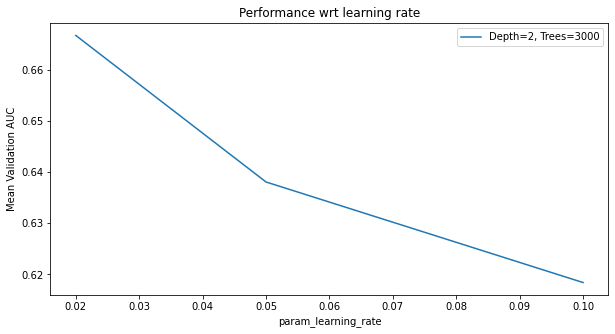

In [ ]:
# First sort by learning rate as that would be x-axis
df_cv_results.sort_values(by='param_learning_rate', inplace=True)

# Find values of AUC for learning rate of 0.05 and different values of depth
lr_t3k_d2 = df_cv_results.loc[(df_cv_results['param_n_estimators']==3000) & (df_cv_results['param_max_depth']==2),:]

# Let us plot now
fig, ax = plt.subplots(figsize=(10,5))
lr_t3k_d2.plot(x='param_learning_rate', y='mean_test_score', label='Depth=2, Trees=3000', ax=ax)
plt.ylabel('Mean Validation AUC')
plt.title('Performance wrt learning rate')

Final Model after hyperparameter tuning

In [ ]:
model_xgboost_fin = xgboost.XGBClassifier(learning_rate=0.02,
                                          max_depth=2,
                                          n_estimators=5000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both
eval_set = [(X_train, y_train),(X_valid, y_valid)]

model_xgboost_fin.fit(X_train,
                  y_train,
                  early_stopping_rounds=20,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-auc:0.753792	validation_1-auc:0.78125
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.736774	validation_1-auc:0.66875
[2]	validation_0-auc:0.763781	validation_1-auc:0.690625
[3]	validation_0-auc:0.795967	validation_1-auc:0.8
[4]	validation_0-auc:0.788013	validation_1-auc:0.79375
[5]	validation_0-auc:0.792823	validation_1-auc:0.69375
[6]	validation_0-auc:0.792823	validation_1-auc:0.69375
[7]	validation_0-auc:0.800777	validation_1-auc:0.70625
[8]	validation_0-auc:0.797262	validation_1-auc:0.70625
[9]	validation_0-auc:0.786164	validation_1-auc:0.70625
[10]	validation_0-auc:0.785609	validation_1-auc:0.70625
[11]	validation_0-auc:0.782834	validation_1-auc:0.70625
[12]	validation_0-auc:0.784684	validation_1-auc:0.70625
[13]	validation_0-auc:0.784684	validation_1-auc:0.70625
[14]	validation_0-auc:0.778949	validation_1-auc:0.73125
[15]	validation_

XGBClassifier(colsample_bytree=0.25, eval_metric='auc', learning_rate=0.02,
              max_depth=2, n_estimators=5000, subsample=0.5,
              use_label_encoder=False)

Let us find out the performance of the final model by calculating AUC value on training and validation sets



In [ ]:
y_train_pred = model_xgboost_fin.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost_fin.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.7960
AUC Valid: 0.8000


Graph AUC

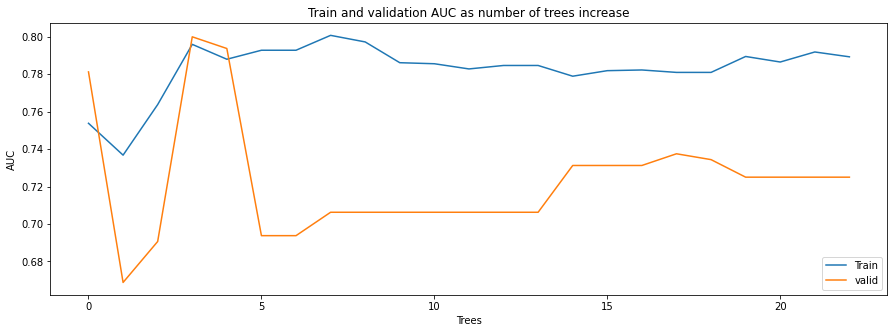

In [ ]:
evaluation_results = model_xgboost_fin.evals_result()

# Index into each key to find AUC values for training and validation data after each tree
train_auc_tree = evaluation_results['validation_0']['auc']
valid_auc_tree = evaluation_results['validation_1']['auc']


# Plotting Section
plt.figure(figsize=(15,5))

plt.plot(train_auc_tree, label='Train')
plt.plot(valid_auc_tree, label='valid')

plt.title("Train and validation AUC as number of trees increase")
plt.xlabel("Trees")
plt.ylabel("AUC")
plt.legend(loc='lower right')
plt.show()